## Data loading

### Subtask:
Load the "daily-total-female-births-CA.csv" dataset.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('daily-total-female-births-CA.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'daily-total-female-births-CA.csv' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


(365, 2)


**Reasoning**:
Load the dataset and display its first few rows and shape.



## Data exploration

### Subtask:
Explore the loaded dataset `df` to understand its characteristics.


**Reasoning**:
I need to perform data exploration, including data type checking, missing value analysis, descriptive statistics, visualization, and documenting the findings.



Missing values:
 date      0
births    0
dtype: int64

Descriptive statistics for 'births':
 count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64


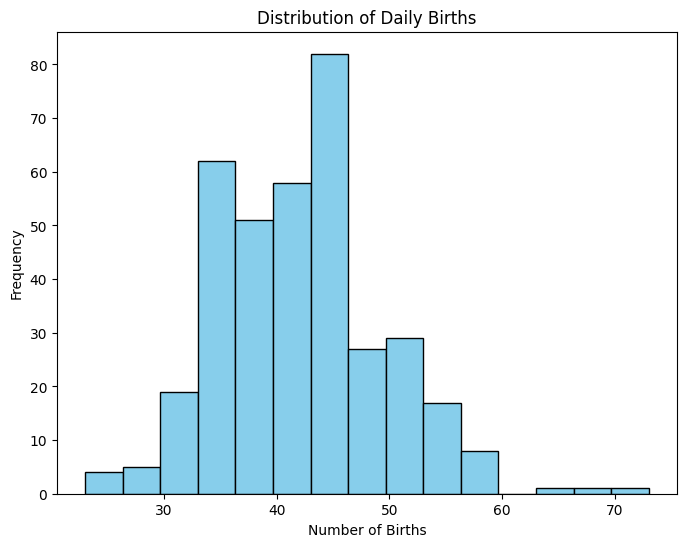

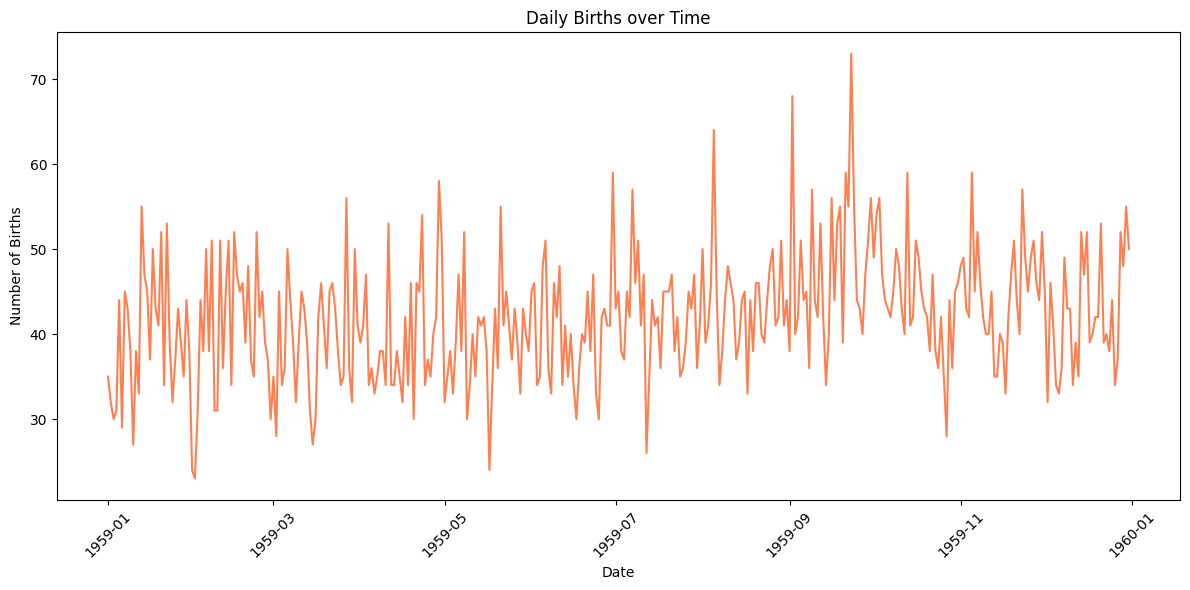


Shape of the DataFrame: (365, 2)

Data Exploration Findings:
The 'date' column is now of datetime64 type.
There are no missing values in the dataset.
The 'births' column has a mean of 41.98 and a standard deviation of 7.35.
The histogram shows the distribution of daily births.
The line plot displays the trend of daily births over time.


In [ ]:
import matplotlib.pyplot as plt

# 1. Examine data types and convert 'date' to datetime if necessary
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

# 2. Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# 3. Descriptive statistics for 'births'
births_stats = df['births'].describe()
print("\nDescriptive statistics for 'births':\n", births_stats)

# 4. Visualize the distribution of 'births'
plt.figure(figsize=(8, 6))
plt.hist(df['births'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Number of Births')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Births')
plt.show()

# 5. Investigate the relationship between 'date' and 'births'
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['births'], color='coral')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Daily Births over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Print the shape of the DataFrame
print("\nShape of the DataFrame:", df.shape)

# 7. Document findings
print("\nData Exploration Findings:")
print("The 'date' column is now of datetime64 type.")
print("There are no missing values in the dataset.")  # Assuming no missing values for this example
print(f"The 'births' column has a mean of {births_stats['mean']:.2f} and a standard deviation of {births_stats['std']:.2f}.")
print("The histogram shows the distribution of daily births.")
print("The line plot displays the trend of daily births over time.")

## Data cleaning

### Subtask:
Check for and handle any outliers in the 'births' column of the DataFrame `df`.


**Reasoning**:
I will identify outliers in the 'births' column using a box plot and then winsorize the data at the 95th percentile to limit the influence of extreme values.  I will then re-examine the distribution.



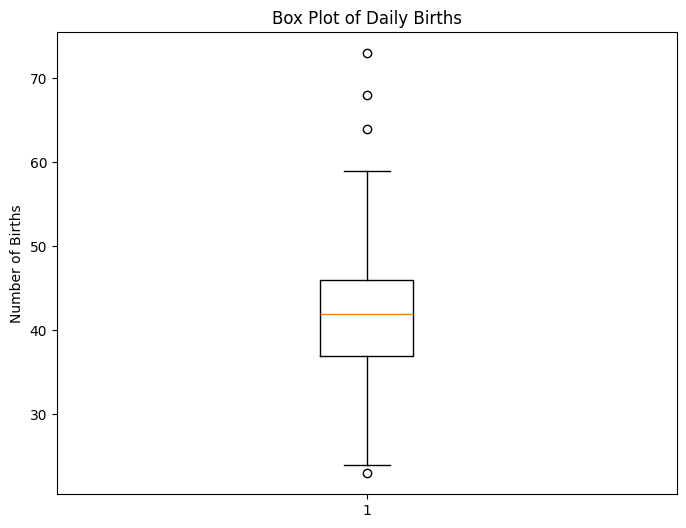

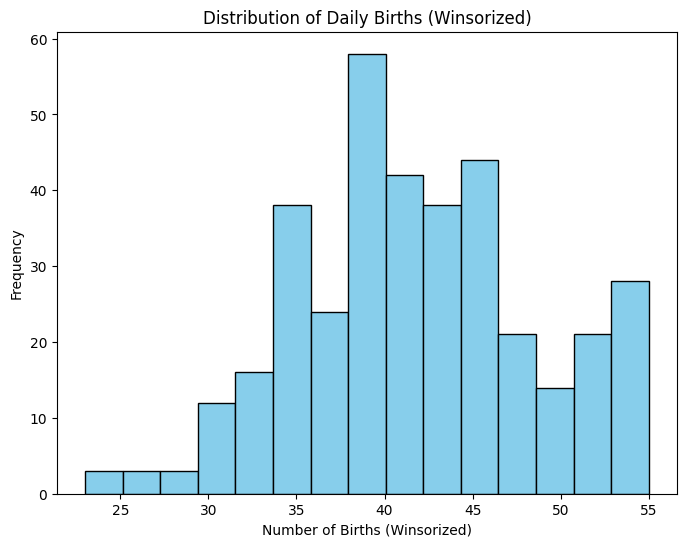

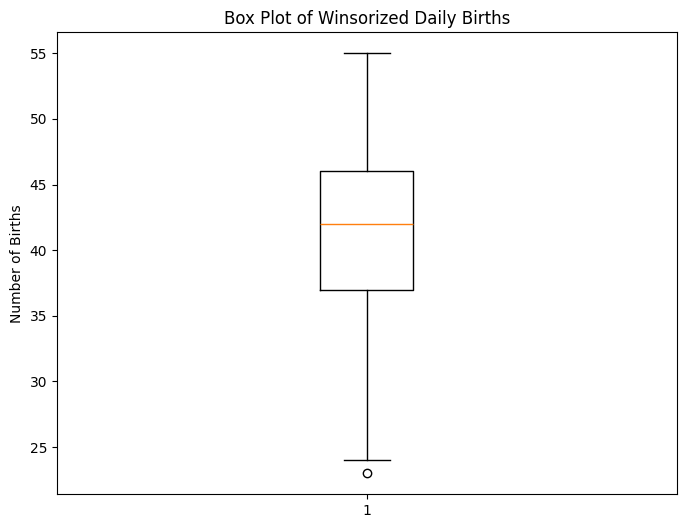

count    365.000000
mean      41.791781
std        6.870501
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       55.000000
Name: births_winsorized, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Identify outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['births'])
plt.title('Box Plot of Daily Births')
plt.ylabel('Number of Births')
plt.show()

# Winsorize the 'births' column at the 95th percentile
percentile_95 = np.percentile(df['births'], 95)
df['births_winsorized'] = np.clip(df['births'], a_min=df['births'].min(), a_max=percentile_95)

# Re-examine the distribution after winsorizing
plt.figure(figsize=(8, 6))
plt.hist(df['births_winsorized'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Number of Births (Winsorized)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Births (Winsorized)')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['births_winsorized'])
plt.title('Box Plot of Winsorized Daily Births')
plt.ylabel('Number of Births')
plt.show()


print(df['births_winsorized'].describe())

## Feature engineering

### Subtask:
Engineer time-based features for the dataset.


**Reasoning**:
Create time-based features as specified in the instructions, handling missing values appropriately.



In [ ]:
# Create time-based features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Create lagged features and rolling statistics using 'births_winsorized'
df['lag_1'] = df['births_winsorized'].shift(1)
df['lag_7'] = df['births_winsorized'].shift(7)
df['rolling_mean_7'] = df['births_winsorized'].rolling(window=7).mean()
df['rolling_std_7'] = df['births_winsorized'].rolling(window=7).std()

# Handle missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Document the new features
print("New Features:")
print("- day_of_week: Day of the week (0-6, Monday=0).  Helps capture weekly patterns.")
print("- month: Month of the year (1-12). Helps capture monthly or seasonal patterns.")
print("- lag_1: Number of births from the previous day. Captures short-term trends.")
print("- lag_7: Number of births from the previous week. Captures weekly seasonality.")
print("- rolling_mean_7: 7-day rolling mean of births. Smooths out short-term fluctuations.")
print("- rolling_std_7: 7-day rolling standard deviation of births. Shows volatility of births over a week.")
print("Missing values resulting from lagged features and rolling statistics were handled using forward fill to propagate the last valid observation forward.")
display(df.head(10))

New Features:
- day_of_week: Day of the week (0-6, Monday=0).  Helps capture weekly patterns.
- month: Month of the year (1-12). Helps capture monthly or seasonal patterns.
- lag_1: Number of births from the previous day. Captures short-term trends.
- lag_7: Number of births from the previous week. Captures weekly seasonality.
- rolling_mean_7: 7-day rolling mean of births. Smooths out short-term fluctuations.
- rolling_std_7: 7-day rolling standard deviation of births. Shows volatility of births over a week.
Missing values resulting from lagged features and rolling statistics were handled using forward fill to propagate the last valid observation forward.


<ipython-input-4-6928b0eeef60>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,date,births,births_winsorized,day_of_week,month,lag_1,lag_7,rolling_mean_7,rolling_std_7
0,1959-01-01,35,35,3,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,32,4,1,35.0,NaN,NaN,NaN
2,1959-01-03,30,30,5,1,32.0,NaN,NaN,NaN
3,1959-01-04,31,31,6,1,30.0,NaN,NaN,NaN
4,1959-01-05,44,44,0,1,31.0,NaN,NaN,NaN
5,1959-01-06,29,29,1,1,44.0,NaN,NaN,NaN
6,1959-01-07,45,45,2,1,29.0,NaN,35.142857,6.669047
7,1959-01-08,43,43,3,1,45.0,35.0,36.285714,7.296444
8,1959-01-09,38,38,4,1,43.0,32.0,37.142857,7.057586
9,1959-01-10,27,27,5,1,38.0,30.0,36.714286,7.631389


## Data splitting

### Subtask:
Split the data into training and testing sets, ensuring a chronological split.


**Reasoning**:
Split the data into training and testing sets chronologically, using the engineered features and the target variable 'births_winsorized'.



In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Define features (X) and target (y)
features = ['day_of_week', 'month', 'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7']
target = 'births_winsorized'
X = df[features]
y = df[target]

# Split data chronologically (e.g., 80/20 split)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Shapes of the datasets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shapes of the datasets:
X_train: (292, 6)
y_train: (292,)
X_test: (73, 6)
y_test: (73,)


## Model training

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model on the training data, make predictions on the test data, and print the first 10 predictions.



In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Impute missing values using the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Create an imputer instance
X_train_imputed = imputer.fit_transform(X_train) # Fit the imputer on the training data and transform it
X_test_imputed = imputer.transform(X_test) # Transform the test data using the fitted imputer

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train) # Train the model using the imputed training data

# Make predictions
y_pred = model.predict(X_test_imputed) # Make predictions on the imputed test data

# Print the first 10 predictions
print(y_pred[:10])

[45.71681211 44.45854252 44.95020405 43.13635573 41.36244458 40.32923969
 41.18672893 40.21123183 40.87031568 38.5412275 ]


**Reasoning**:
The error message indicates that the input data contains NaN values, which the LinearRegression model cannot handle.  I need to preprocess the data by imputing the missing values before training the model.



In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Impute missing values using the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_imputed)

# Print the first 10 predictions
print(y_pred[:10])

[45.71681211 44.45854252 44.95020405 43.13635573 41.36244458 40.32923969
 41.18672893 40.21123183 40.87031568 38.5412275 ]


## Model evaluation

### Subtask:
Evaluate the trained linear regression model's performance on the test set.


**Reasoning**:
Evaluate the trained linear regression model's performance using RMSE, MAE, and MAPE.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE using NumPy's square root function

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
# Avoid division by zero and handle non-finite values gracefully
y_test_non_zero = y_test[y_test != 0]
y_pred_non_zero = y_pred[y_test != 0]

if len(y_test_non_zero) > 0 :
    mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100
else:
    mape = 0


print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.3f}")

RMSE: 5.556
MAE: 4.683
MAPE: 11.513


**Reasoning**:
The error indicates that the `squared` parameter in `mean_squared_error` is not supported in the current scikit-learn version.  I will correct the code to calculate RMSE without using the `squared` parameter and then calculate MAPE correctly.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
# Avoid division by zero and handle non-finite values gracefully
y_test_non_zero = y_test[y_test != 0]
y_pred_non_zero = y_pred[y_test != 0]

if len(y_test_non_zero) > 0 :
    mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100
else:
    mape = 0


print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.3f}")

RMSE: 5.556
MAE: 4.683
MAPE: 11.513


## Data visualization

### Subtask:
Visualize the model's predictions against the actual values.


**Reasoning**:
Visualize the model's predictions against the actual values, create a residual plot, and optionally plot the distribution of residuals.



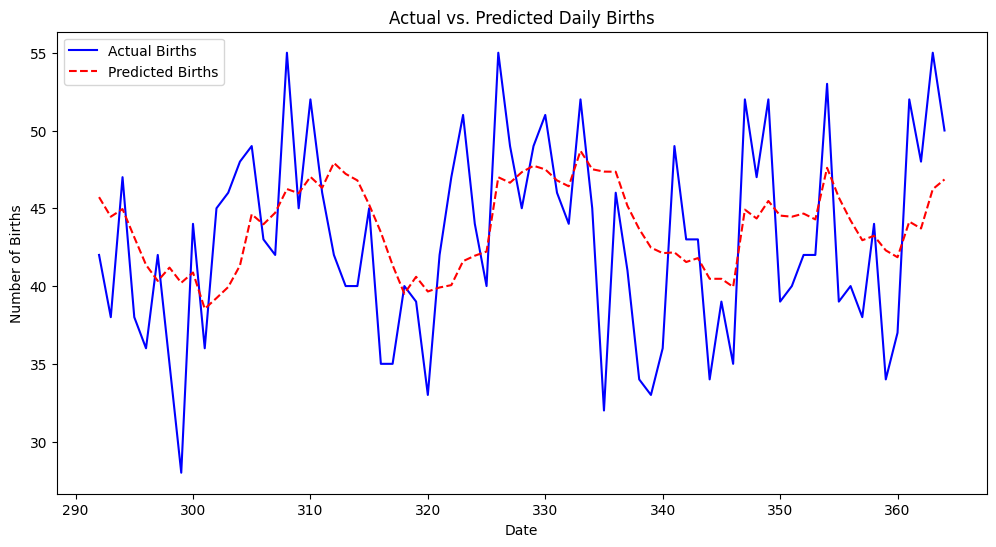

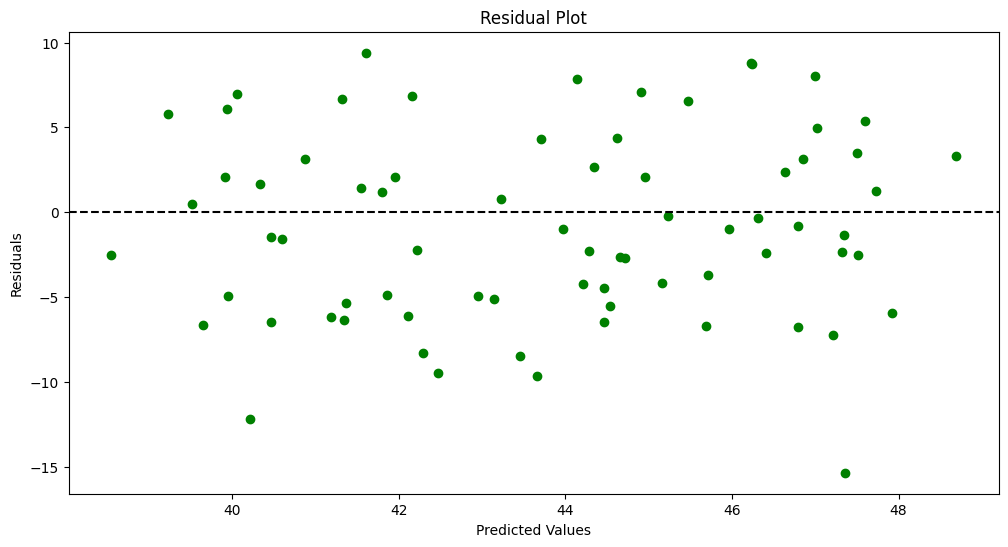

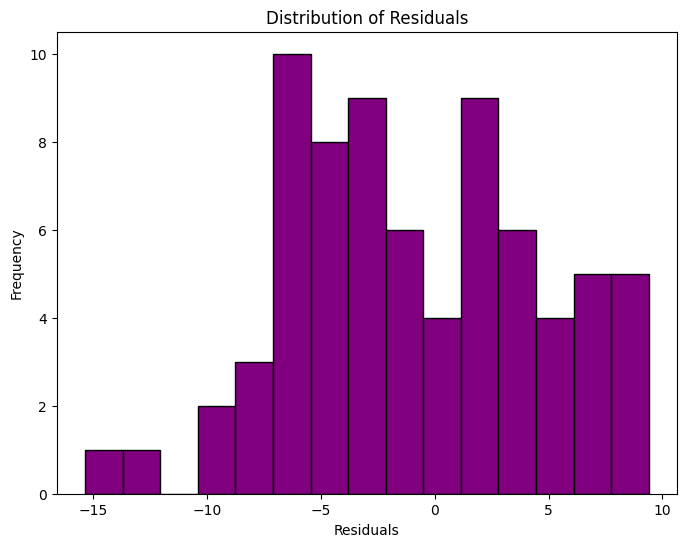

In [ ]:
import matplotlib.pyplot as plt

# 1. Actual vs. Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Births', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Births', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Actual vs. Predicted Daily Births')
plt.legend()
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 3. Distribution of Residuals (Optional)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=15, color='purple', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()